# Programación Python para Machine Learning.

## Autor: Victor Simo Lozano

## Actividad 14
<p>Deep Learning II.</p>
    

<hr style="border-color:red">

- Carga el conjunto de datos RockPaperScissors que trae la propia biblioteca TensorFlow y realiza los siguientes puntos:
    - Diseña, implementa y prueba un modelo de Red Neuronal Convolucional (CNN) que trate de resolver este problema de clasificación multiclase de imágenes.
    - Muestra la matriz de confusión para comprobar el rendimiento del modelo.

In [1]:
# Generales 
from pandas import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import clear_output
import warnings

warnings.filterwarnings('ignore')

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br></div>

<div style="font-size:14px; text-align:justify"><b>1: </b>Carga el conjunto de datos RockPaperScissors que trae la propia biblioteca TensorFlow.</div>

In [3]:
!pip show tensorflow-datasets

Name: tensorflow-datasets
Version: 4.7.0
Summary: tensorflow/datasets is a library of datasets ready to use with TensorFlow.
Home-page: https://github.com/tensorflow/datasets
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\python3_8_5\lib\site-packages
Requires: absl-py, dill, etils, importlib-resources, numpy, promise, protobuf, requests, six, tensorflow-metadata, termcolor, toml, tqdm
Required-by: 


In [4]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [5]:
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Muestra de los datos
ds_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\vicsi\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scisso

In [7]:
num_classes=ds_info.features['label'].num_classes
input_shape=ds_info.features['image'].shape
class_names=ds_info.features['label'].names

<div style="font-size:14px; text-align:justify"><b>2.1.: </b>Diseña, implementa y prueba un modelo de Red Neuronal Convolucional (CNN) que trate de resolver este problema de clasificación multiclase de imágenes.</div>

In [8]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label


def split_data(ds):
    train=[]
    test=[]
    for data, label in ds:
        train.append(data)
        test.append(label)
    
    return train, test

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
X_train, y_train = split_data(ds_train)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)
X_test, y_test = split_data(ds_test)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

display(model.summary())

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

train_history=model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

None

Epoch 1/10
20/20 [==============================] - 638s 30s/step - loss: 1.0350 - accuracy: 0.4917 - val_loss: 0.9780 - val_accuracy: 0.4328
Epoch 2/10
20/20 [==============================] - 512s 26s/step - loss: 0.4409 - accuracy: 0.8278 - val_loss: 0.5467 - val_accuracy: 0.7285
Epoch 3/10
20/20 [==============================] - 523s 26s/step - loss: 0.1109 - accuracy: 0.9702 - val_loss: 0.3926 - val_accuracy: 0.8575
Epoch 4/10
20/20 [==============================] - 523s 26s/step - loss: 0.0380 - accuracy: 0.9905 - val_loss: 0.7143 - val_accuracy: 0.7661
Epoch 5/10
20/20 [==============================] - 510s 25s/step - loss: 0.0225 - accuracy: 0.9956 - val_loss: 0.4769 - val_accuracy: 0.8253
Epoch 6/10
20/20 [==============================] - 535s 27s/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.5571 - val_accuracy: 0.8387
Epoch 7/10
20/20 [==============================] - 599s 30s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.5756 - val_accuracy: 0.8468
Epoch 

Test loss: 0.6644497513771057
Test accuracy: 0.8198924660682678


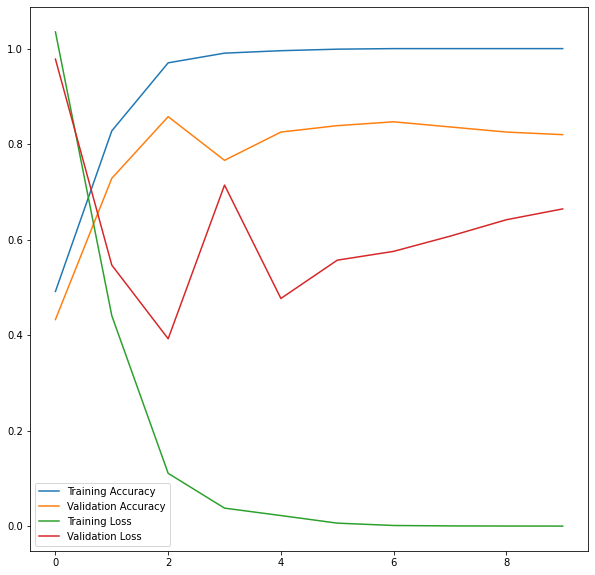

In [10]:
# Evaluacion del modelo
score = model.evaluate(ds_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Grafica de evolucion
result_df=pd.DataFrame(train_history.history)
result_df['epoch']=train_history.epoch

fig, ax= plt.subplots(figsize=(10,10))
num_epochs=result_df.shape[0]
ax.plot(np.arange(0, num_epochs), result_df['accuracy'], label='Training Accuracy')
ax.plot(np.arange(0, num_epochs), result_df['val_accuracy'], label='Validation Accuracy')
ax.plot(np.arange(0, num_epochs), result_df['loss'], label='Training Loss')
ax.plot(np.arange(0, num_epochs), result_df['val_loss'], label='Validation Loss')

ax.legend()
plt.show()

<div style="font-size:14px; text-align:justify"><b>2.2.: </b>Muestra la matriz de confusión para comprobar el rendimiento del modelo.</div>

12/12 [==============================] - 8s 676ms/step


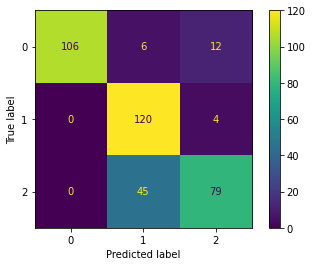

In [19]:
from sklearn.metrics import plot_confusion_matrix

class estimator:
    _estimator_type = ''
    classes_=[]
    def __init__(self, model, classes):
        self.model = model
        self._estimator_type = 'classifier'
        self.classes_ = classes
    def predict(self, X):
        y_prob= self.model.predict(X)
        y_pred = y_prob.argmax(axis=1)
        return y_pred

classifier = estimator(model, class_names)

try:
    y_test=np.concatenate((y_test[0],y_test[1],y_test[2]))
    X_test=np.concatenate((X_test[0],X_test[1],X_test[2]))
except:
    pass

plot_confusion_matrix(estimator=classifier, X=X_test, y_true=y_test)